In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as colors


from datetime import datetime,timezone 

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
### Function to plot basemap and lon lat labels ###
def plot_background(ax):
    ax.add_feature(cf.LAKES.with_scale('10m'),facecolor='none', edgecolor='black',linewidth=0.8)
    ax.add_feature(cf.COASTLINE.with_scale('10m'),facecolor='none', edgecolor='black', linewidth=1) 
    return ax

def plot_ticks(ax):
    ax.set_yticks(np.arange(5, 22, 5), crs=ccrs.PlateCarree())
    ax.set_xticks(np.arange(115, 127, 5), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    return ax

In [4]:
from matplotlib.colors import LinearSegmentedColormap


color_dict1 = {'skyblue': '#3498DB',
               'green1': '#7CFC00',
               'red1' : '#E74C3C',
               'yellow1' : '#F6F91A',
               'violet1' : '#8E44AD',
               'orange1' : '#FFBF00',
               'pink1': '#FFC0CB',
               'cornsilk': '#FFF8DC',
               'gray' : '#808080'
               }

mycolorbar1 = LinearSegmentedColormap.from_list('mycolorbar1', [
    color_dict1['skyblue'],
    color_dict1['green1'],
    color_dict1['red1'],
    color_dict1['yellow1'],
    color_dict1['violet1']])

'''
    color_dict1['orange1'],
    color_dict1['pink1'],
    color_dict1['cornsilk'],
    color_dict1['gray']'''

"\n    color_dict1['orange1'],\n    color_dict1['pink1'],\n    color_dict1['cornsilk'],\n    color_dict1['gray']"

In [5]:
df = pd.read_csv('pa_clusters_all_withTC.csv')
df.loc[ df["cluster_2"] == 1, "cluster2"] = 2
df.loc[ df["cluster_2"] == 2, "cluster2"] = 1
df['cluster2'] = df['cluster2'].astype(int)
df['cluster_2'] = df['cluster2']
df_pa = df

df_pa = pd.melt(df_pa, id_vars=['lon','lat','cluster_2', 'cluster_3',
       'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8',
       'cluster_9'], value_vars=['2013-05-01 00:00:00',
       '2013-05-01 01:00:00', '2013-05-01 02:00:00', '2013-05-01 03:00:00',
       '2013-05-01 04:00:00', '2013-05-01 05:00:00', '2013-05-01 06:00:00',
       '2013-05-01 07:00:00', '2013-05-01 08:00:00', '2013-05-01 09:00:00',
       '2013-05-01 10:00:00', '2013-05-01 11:00:00', '2013-05-01 12:00:00',
       '2013-05-01 13:00:00', '2013-05-01 14:00:00', '2013-05-01 15:00:00',
       '2013-05-01 16:00:00', '2013-05-01 17:00:00', '2013-05-01 18:00:00',
       '2013-05-01 19:00:00', '2013-05-01 20:00:00', '2013-05-01 21:00:00',
       '2013-05-01 22:00:00', '2013-05-01 23:00:00'])
df_pa['time'] = pd.to_datetime(df_pa.variable)
df_pa['hr'] = df_pa['time'].dt.hour


df_pa['pa_val'] = df_pa['value']
df_pa = df_pa[['lon','lat','hr','pa_val','cluster_2']]
df_pa

,lon,lat,hr,pa_val,cluster_2
0,117.0623,7.985905,0,0.986189,1
1,117.4356,8.550700,0,0.744234,2
2,117.5013,8.876000,0,0.715072,2
3,117.6346,8.677431,0,0.634142,2
4,117.6480,9.019500,0,0.848090,1
...,...,...,...,...,...
15115,126.4136,8.036845,23,1.337798,1
15116,126.4482,7.049400,23,1.184434,1
15117,126.4543,7.790300,23,1.658482,1
15118,126.5649,7.327000,23,1.113517,1


In [6]:
df_pf = pd.read_csv('../wpf_final_scripts/pf_withTC.csv')

df_pf = pd.melt(df_pf, id_vars=['lon','lat'], value_vars=['2013-05-01 00:00:00',
       '2013-05-01 01:00:00', '2013-05-01 02:00:00', '2013-05-01 03:00:00',
       '2013-05-01 04:00:00', '2013-05-01 05:00:00', '2013-05-01 06:00:00',
       '2013-05-01 07:00:00', '2013-05-01 08:00:00', '2013-05-01 09:00:00',
       '2013-05-01 10:00:00', '2013-05-01 11:00:00', '2013-05-01 12:00:00',
       '2013-05-01 13:00:00', '2013-05-01 14:00:00', '2013-05-01 15:00:00',
       '2013-05-01 16:00:00', '2013-05-01 17:00:00', '2013-05-01 18:00:00',
       '2013-05-01 19:00:00', '2013-05-01 20:00:00', '2013-05-01 21:00:00',
       '2013-05-01 22:00:00', '2013-05-01 23:00:00'])
df_pf['time'] = pd.to_datetime(df_pf.variable)
df_pf['hr'] = df_pf['time'].dt.hour

df_pf['pf_val'] = df_pf['value']
df_pf = df_pf[['lon','lat','hr','pf_val']]
df_pf

,lon,lat,hr,pf_val
0,117.0623,7.985905,0,1.062104
1,117.4356,8.550700,0,0.580888
2,117.5013,8.876000,0,0.744891
3,117.6346,8.677431,0,0.722239
4,117.6480,9.019500,0,0.722007
...,...,...,...,...
15115,126.4136,8.036845,23,0.912650
15116,126.4482,7.049400,23,1.353976
15117,126.4543,7.790300,23,1.504636
15118,126.5649,7.327000,23,1.339270


In [7]:
df = pd.merge(df_pa, df_pf, on=["lon", "lat","hr"], how="left").dropna()

In [8]:
df

,lon,lat,hr,pa_val,cluster_2,pf_val
0,117.0623,7.985905,0,0.986189,1,1.062104
1,117.4356,8.550700,0,0.744234,2,0.580888
2,117.5013,8.876000,0,0.715072,2,0.744891
3,117.6346,8.677431,0,0.634142,2,0.722239
4,117.6480,9.019500,0,0.848090,1,0.722007
...,...,...,...,...,...,...
15115,126.4136,8.036845,23,1.337798,1,0.912650
15116,126.4482,7.049400,23,1.184434,1,1.353976
15117,126.4543,7.790300,23,1.658482,1,1.504636
15118,126.5649,7.327000,23,1.113517,1,1.339270


In [9]:
sum_2 = df.groupby(['cluster_2','hr']).agg({'pf_val': ['mean', 'max', 'min','std', 'count']}).droplevel(axis=1, level=0).reset_index()
#sum_3 = df.groupby(['cluster_3','hr']).agg({'pf_val': ['mean', 'max', 'min','std', 'count']}).droplevel(axis=1, level=0).reset_index()
#sum_4 = df.groupby(['cluster_4','hr']).agg({'pf_val': ['mean', 'max', 'min','std', 'count']}).droplevel(axis=1, level=0).reset_index()
#sum_5 = df.groupby(['cluster_5','hr']).agg({'value': ['mean', 'max', 'min','std', 'count']}).droplevel(axis=1, level=0).reset_index()

In [10]:
sum_2.to_csv('PF_clustered_by_PA_withTC.csv')

/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_3380/3643098753.py:69: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/pf_all_cluster_2_withTC.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


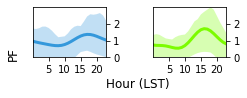

In [11]:
mycolorbar1 = LinearSegmentedColormap.from_list('mycolorbar1', [
    color_dict1['yellow1'],color_dict1['green1'],color_dict1['red1'],color_dict1['skyblue']])
                                               


fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(10, 12)



ax11 = fig.add_subplot(gs[2, 0:2])
ax22 = fig.add_subplot(gs[2, 3:5])



################################################################
s = sum_2[sum_2['cluster_2'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
max_ = s['max']
min_ = s['min']
ax11.plot(t, mu1, lw=3, label='opaque', color='#3498DB')
ax11.fill_between(t, min_, max_, facecolor='#3498DB', alpha=0.3)
ax11.yaxis.tick_right() 
#ax11.text(1, 3, 'K=1 \n6%',  fontsize=8)
#ax11.text(-1.7, 1.8, 'c',  fontsize=8)
################################################################
s = sum_2[sum_2['cluster_2'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
max_ = s['max']
min_ = s['min']
ax22.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax22.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)
ax22.yaxis.tick_right() 
#ax22.text(1, 3, 'K=2 \n40%', fontsize=8)
#ax22.text(-1.7, 2, 'b',  fontsize=8)
################################################################

################################################################

################################################################
ax11.set_xticks([5,10,15,20])
ax22.set_xticks([5,10,15,20])


ax11.set_yticks([0,1,2])
ax22.set_yticks([0,1,2])


ax11.set_xlim(0,23)
ax11.set_ylim(0,3)
ax22.set_xlim(0,23)
ax22.set_ylim(0,3)

################################################################
#ax1.text(128, 15, 'PA (mm h-1)', rotation=90, fontsize=12)
ax11.text(-8, 0, 'PF', rotation=90, fontsize=12)


ax11.text(23, -1.8, 'Hour (LST)', fontsize=12)
#plt.text(-3, 0.67, 'Cluster Number', rotation=90, fontsize=15)

images_dir = 'Images'
plt.savefig(f"{images_dir}/pf_all_cluster_2_withTC.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")
